In [2]:
!pip install statsmodels

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from matplotlib.pyplot import figure

In [71]:
df = pd.read_csv('./csv/apple_x_socio.csv')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     322 non-null    int64  
 1   model                                          322 non-null    object 
 2   country_code                                   322 non-null    object 
 3   country                                        322 non-null    object 
 4   region                                         322 non-null    object 
 5   income group                                   322 non-null    object 
 6   scraped_date                                   322 non-null    object 
 7   model_en                                       322 non-null    object 
 8   price_local_currency                           322 non-null    float64
 9   Currency CodeA                                 322 non

# Korrelationsmatrix

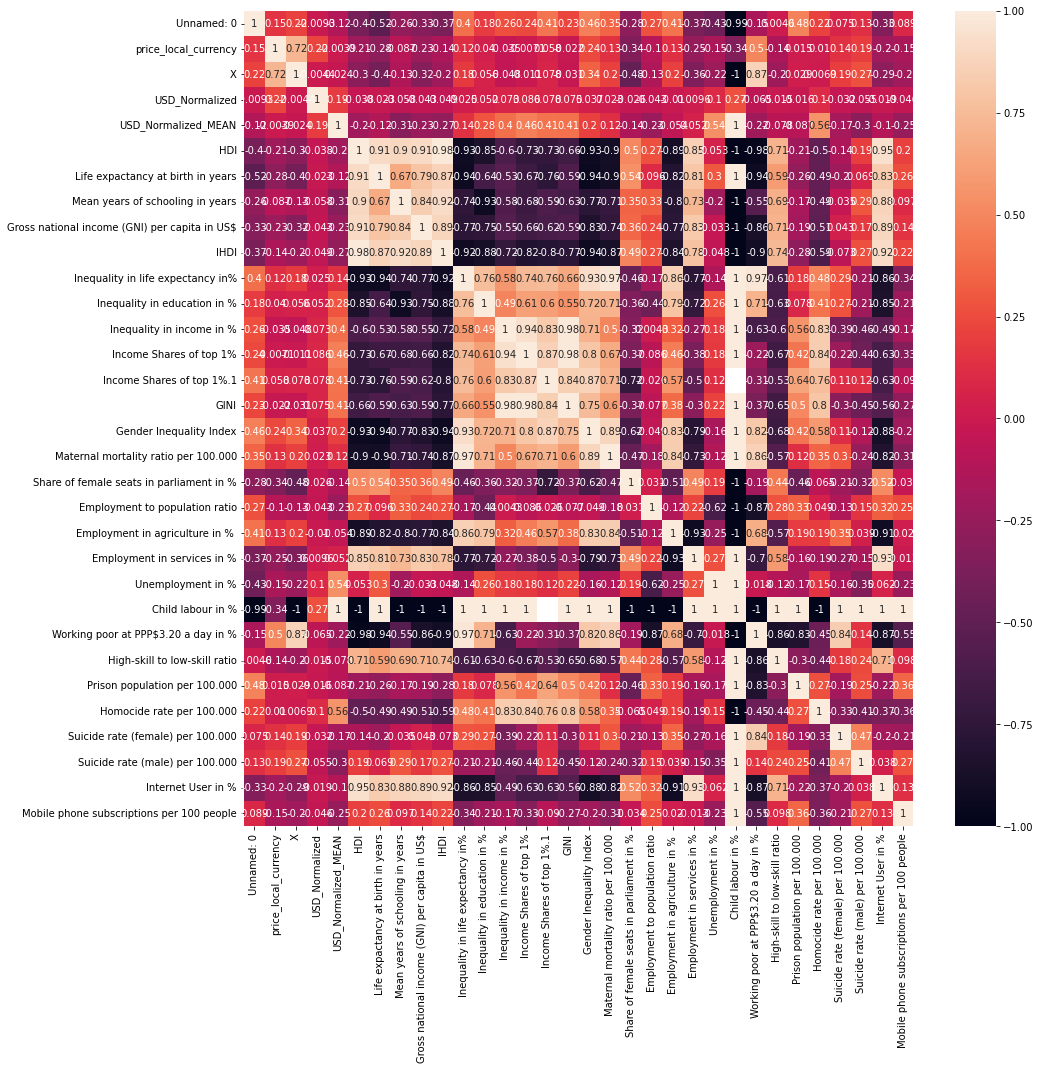

In [73]:
corrMatrix = df.corr()
figure(figsize=(15, 15))
sns.heatmap(corrMatrix, annot=True)

plt.show()

## Highest Correlations

In [74]:
df["USD_Normalized_MEAN"].corr(df["Homocide rate per 100.000"])

0.5567168171037132

In [75]:
df["USD_Normalized_MEAN"].corr(df["GINI"])

0.4058684329860887

In [76]:
df["USD_Normalized_MEAN"].corr(df["Income Shares of top 1%"])

0.46425310289268035

In [77]:
df["USD_Normalized_MEAN"].corr(df["Inequality in income in %"])

0.3954479537834596

## Lowest Correlation

In [78]:
df["USD_Normalized_MEAN"].corr(df["Prison population per 100.000"])

-0.08696192397856052

# Lineare Regression

In [79]:
X = df["GINI"]
y = df["USD_Normalized_MEAN"]

In [80]:
# x = sm.add_constant(x1)
lm = sm.OLS(y,X).fit()

In [81]:
lm.predict(X)

0      509.527668
1      509.527668
2      509.527668
3      509.527668
4      509.527668
          ...    
317    613.210624
318    613.210624
319    613.210624
320    613.210624
321    613.210624
Length: 322, dtype: float64

In [82]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     USD_Normalized_MEAN   R-squared (uncentered):                   0.963
Model:                             OLS   Adj. R-squared (uncentered):              0.963
Method:                  Least Squares   F-statistic:                              8400.
Date:                 Sat, 09 Apr 2022   Prob (F-statistic):                   3.08e-232
Time:                         11:40:56   Log-Likelihood:                         -1944.9
No. Observations:                  322   AIC:                                      3892.
Df Residuals:                      321   BIC:                                      3896.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GINI          14.8119      0.162     91.652      0.000      14.494      15.130
==============================================================================
Omnibus:                       31.962   Durbin-Watson:                   0.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.272
Skew:                          -0.737   Prob(JB):                     5.96e-08
Kurtosis:                       2.448   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

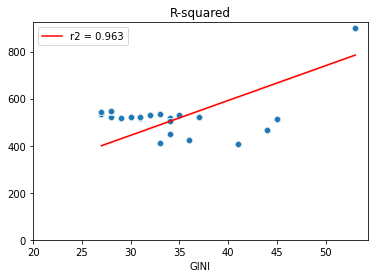

In [90]:
# plotting the data points
sns.scatterplot(x=df['GINI'], y=y)
#plotting the line
sns.lineplot(x=df['GINI'],y=lm.predict(X), color='red', label="r2 = 0.963")
#axes
plt.xlim(20)
plt.ylim(0)
plt.title("R-squared")
# plt.legend("r2", loc="lower right")
plt.show()

# Logistische Regression

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import time

In [85]:
df['USD_Normalized_MEAN'] = df['USD_Normalized_MEAN'].astype(int)
df['GINI'] = df['GINI'].astype(int)

y = df["USD_Normalized_MEAN"].to_numpy()
X = df["GINI"].to_numpy().reshape(-1, 1)

train_x, test_x, train_y, test_y = train_test_split(X, y)

clf = LogisticRegression(max_iter=300)

t0 = time.time()
clf.fit(train_x, train_y)
t1 = time.time()
# Klassifikationsgüte berechnen
print("Genauigkeit: %f" % accuracy_score(test_y, clf.predict(test_x)), "Laufzeit: ", t1-t0)

Genauigkeit: 0.333333 Laufzeit:  0.08099842071533203


C:\Users\lukas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# AdaBoostRegressor

In [86]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error


adaboostregressor = AdaBoostRegressor(random_state=1)
t0 = time.time()
adaboostregressor.fit(train_x, train_y)
t1 = time.time()
pred = adaboostregressor.predict(test_x)
print("MAE:", mean_absolute_error(test_y, pred), "Laufzeit: ", t1-t0)

MAE: 22.919354976798346 Laufzeit:  0.004996538162231445


# BaggingRegressor

In [87]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error


BaggingRegressor = BaggingRegressor(random_state=1)
t0 = time.time()
BaggingRegressor.fit(train_x, train_y)
t1 = time.time()
pred = BaggingRegressor.predict(test_x)
print("MAE:", mean_absolute_error(test_y, pred), "Laufzeit: ", t1-t0)

MAE: 8.980825929342883 Laufzeit:  0.014998912811279297


# DecisionTree

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
model = DecisionTreeRegressor()
t0 = time.time()
model.fit(train_x, train_y)
t1 = time.time()
predictions = model.predict(test_x)

print("MAE: ", mean_absolute_error(test_y, predictions), "Laufzeit: ", t1-t0)

MAE:  9.075786006242113 Laufzeit:  0.0009989738464355469


## Ergebnisse 

| Modell                | MAE                 | Laufzeit              |
|-----------------------|---------------------|-----------------------|
| LogisticRegression    | 0.333333             | 0.08099842071533203   |
| AdaBoostRegressor     | 22.919354976798346   | 0.004996538162231445   |
| BaggingRegressor      | 8.980825929342883  | 0.014998912811279297  |
| DecisionTreeRegressor | 9.075786006242113  | 0.0009989738464355469 |
